TWITTER ADDICTION STUDY

Revision History
180419:  Intial release, EF
190709:  Updated search to provide multiple search timeframes and to export "smartly". EF

In [35]:
# Load Libraries
import tweepy
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import string
from collections import Counter
import datetime

In [3]:
# Set Global Variables
tdate = datetime.datetime.now().strftime("%Y%m%d") # Gets today's year, month, day to assist in csv file creation later in this code.

In [7]:
# load twitter creditials data from silent file
%run ~/twitter_credentials.py

In [8]:
# Use tweepy.OAuthHandler to create an authentication using the given key and secret creditials
auth = tweepy.OAuthHandler(consumer_key=con_key, consumer_secret=con_secret)
auth.set_access_token(acc_token, acc_secret)

# Connect to the Twitter API using the authentication
api = tweepy.API(auth)

In [9]:
# Use the REST API for a static search of Twitter feeds
# primary addiction search

num_needed = 25000
tweet_list_f = []
last_id = -1 # id of last tweet seen
while len(tweet_list_f) < num_needed:
    try:
        new_tweets = api.search(q = '#%23addiction -filter:retweets', tweet_mode='extended', count = 100, max_id = str(last_id - 1))
    except tweepy.TweepError as e:
        print("Error", e)
        break
    else:
        if not new_tweets:
            print("Could not find any more tweets!")
            break
        tweet_list_f.extend(new_tweets)
        last_id = new_tweets[-1].id

len(tweet_list_f)

Could not find any more tweets!


4994

In [11]:
# tech addiction, texting while driving
num_needed = 25000 # maximum of tweets to find
tweet_list_d = []
last_id = -1 # id of last tweet seen
while len(tweet_list_d) < num_needed:
    try:
        new_tweets = api.search(q = '#%23driving%20texting -filter:retweets', tweet_mode='extended', count = 1000, max_id = str(last_id - 1))
    except tweepy.TweepError as e:
        print("Error", e)
        break
    else:
        if not new_tweets:
            print("Could not find any more tweets!")
            break
        tweet_list_d.extend(new_tweets)
        last_id = new_tweets[-1].id
        
len(tweet_list_d)

Could not find any more tweets!


34

In [13]:
# tech addiction, phone more important than another person
num_needed = 25000
tweet_list_e = []
last_id = -1 # id of last tweet seen
while len(tweet_list_e) < num_needed:
    try:
        new_tweets = api.search(q = '#%23phone%20down -filter:retweets', tweet_mode='extended', count = 100, max_id = str(last_id - 1))
    except tweepy.TweepError as e:
        print("Error", e)
        break
    else:
        if not new_tweets:
            print("Could not find any more tweets!")
            break
        tweet_list_e.extend(new_tweets)
        last_id = new_tweets[-1].id

len(tweet_list_e)


Could not find any more tweets!


18

In [14]:
# Create pandas dataframe from twitter output, technology addiction
data4 = pd.DataFrame(data=[tweet.full_text for tweet in tweet_list_e], columns=['Tweet_Text'])
data4['retweet'] = np.array([tweet.retweeted for tweet in tweet_list_e])
data4['language'] = np.array([tweet.lang for tweet in tweet_list_e])
data4.head()

,Tweet_Text,retweet,language
0,😅📱the smart phone life! Scrolling down scrolli...,False,en
1,@MSHPTrooperGHQ reported 139 #carcrash #injuri...,False,en
2,"Buy Mobiles At Zero Down Payment OppoF11, Oppo...",False,en
3,"#Tiger vs #motorcycle. Put down the #phone, ta...",False,en
4,Stand up &amp; sit back down on it. celebrate ...,False,en


In [15]:
# Create pandas dataframe from twitter output, main addiction area
data = pd.DataFrame(data=[tweet.full_text for tweet in tweet_list_f], columns=['Work_Tweet_Text'])
data['retweet'] = np.array([tweet.retweeted for tweet in tweet_list_f])
data['language'] = np.array([tweet.lang for tweet in tweet_list_f])
data.head()

,Work_Tweet_Text,retweet,language
0,8:17 Why We Need to Think Differently About Ad...,False,en
1,New blog post at https://t.co/YihSUNlrrv! For ...,False,en
2,No one starts out in life deciding they are go...,False,en
3,Knowing which TYPE of memory may be impaired h...,False,en
4,Really good information and the nature of kind...,False,en


In [16]:
# Create pandas dataframe from twitter output, technology addiction
data2 = pd.DataFrame(data=[tweet.full_text for tweet in tweet_list_d], columns=['Tweet_Text'])
data2['retweet'] = np.array([tweet.retweeted for tweet in tweet_list_d])
data2['language'] = np.array([tweet.lang for tweet in tweet_list_d])
data2.head()

,Tweet_Text,retweet,language
0,Distracted Drivers are 29 Times More Likely to...,False,en
1,Don’t #Text and Drive. Let’s save #SomeLives.\...,False,en
2,Distracted Drivers are 29 Times More Likely to...,False,en
3,Distracted Drivers are 29 Times More Likely to...,False,en
4,Studies have shown that people who read or wri...,False,en


In [18]:
data.describe()

,Work_Tweet_Text,retweet,language
count,4994,4994,4994
unique,4819,1,28
top,Addiction Solutions: https://t.co/1JP42JZvzI\n...,False,en
freq,9,4994,4436


In [19]:
# create variable to parse data of main twitter collection into categories.
# add specific technology searches to results
def count_addiction(all_text):
    my_data = []
    addiction = 0 # create variables starting at 0 for all addiction types
    illegal_drugs = 0
    prescription_drugs = 0
    shopping = 0
    sex = 0
    gambling = 0
    technology = 0
    not_tech = 0
    alcohol = 0
    smoking = 0
    caffeine = 0
    addiction = len(tweet_list_d) + len(tweet_list_e) # add counts of put phone down and driving and texting as technology addicted
    technology = len(tweet_list_d) + len(tweet_list_e)
    for s in all_text:
        words = ["cocaine", "meth", "marijuana", "heroin", "drugs"]
        for w in words:
            if w in s:
                illegal_drugs = illegal_drugs + 1
                addiction = addiction + 1
                break # only count one occurance of addiction method
        words = ["pills", "opioid", "oxycontin", "painkiller", "painkillers"]
        for w in words:
            if w in s:
                prescription_drugs = prescription_drugs + 1
                addiction = addiction + 1
                break
        words = ["shop", "shopping", "buy", "buying"]
        for w in words:
            if w in s:
                shopping = shopping + 1
                addiction = addiction + 1
                break
        words = ["sex", "porn", "pornography"]
        for w in words:
            if w in s:
                sex = sex + 1
                addiction = addiction + 1
                break
        words = ["gambling", "gamble", "bet", "betting", "casino", "horse", "horses"]
        for w in words:
            if w in s:
                gambling = gambling + 1
                addiction = addiction + 1
                break
        words = ["alcohol", "alcoholism", "drink", "drinking", "party"]
        for w in words:
            if w in s:
                alcohol = alcohol + 1
                addiction = addiction + 1
                break
        words = ["smoking", "smoke", "cigarettes", "ecigarettes"]
        for w in words:
            if w in s:
                smoking = smoking + 1
                addiction = addiction + 1
                break
        words = ["caffeine", "coffee", "tea", "red bull", "energy"]
        for w in words:
            if w in s:
                caffeine = caffeine + 1
                addiction = addiction + 1
                break
        words = ["phone", "iphone", "digital", "technology", "facebook", "smartphone", "texting", "driving", "gaming", "internet", "video"]
        for w in words:
            if w in s:
                technology = technology + 1
                addiction = addiction + 1
                break
        words = ["caffeine", "coffee", "tea", "red bull", "energy", "cocaine", "meth", "marijuana", "heroin", "drugs", "pills", "opioid", "oxycontin", "painkiller", "painkillers","shop", "shopping", "buy", "buying","sex", "porn", "pornography", "gambling", "gamble", "bet", "betting", "casino", "horse", "horses", "alcohol", "alcoholism", "drink", "drinking", "party","smoking", "smoke", "cigarettes", "ecigarettes"]
        for w in words:
            if w in s:
                not_tech = not_tech + 1
                break
    # create a dataframe to hold the results
    addiction_names = ["Total_addiction", "illegal_drugs", "prescription_drugs", "shopping", "sex", "gambling", "technology", "alcohol", "smoking", "Caffeine", "Not Tech"]
    addiction_values = [addiction, illegal_drugs, prescription_drugs, shopping, sex, gambling, technology, alcohol, smoking, caffeine, not_tech]
    my_data_df = pd.DataFrame({"Addiction" : addiction_names, "Number" : addiction_values})
    return my_data_df

In [28]:
# call the function to extract the data from the tweet searches and store it into a variable
dataframe_addiction = count_addiction(data['Work_Tweet_Text'])
# print the results
count_addiction(data['Work_Tweet_Text'])

,Addiction,Number
0,Total_addiction,1991
1,illegal_drugs,417
2,prescription_drugs,309
3,shopping,30
4,sex,136
5,gambling,223
6,technology,236
7,alcohol,460
8,smoking,51
9,Caffeine,129


# markdown cell of styles of addiction and it's related symptoms
illegal_drugs = ["cocaine", "meth", "marijuana", "heroin", "drugs"]
perscription_drugs = ["pills", "opioid", "oxycontin", "painkiller", "painkillers"]
shopping = ["shop", "shopping", "buy", "buying"]
sex = ["sex", "porn", "pornography"]
gambling = ["gambling", "gamble", "bet", "betting", "casino", "horse", "horses"]
alcohol = ["alcohol", "alcoholism", "drink", "drinking", "party"]
smoking = ["smoking", "smoke", "cigarettes", "ecigarettes"]
technology = ["phone", "iphone", "digital", "technology", "facebook", "smartphone", "texting", "driving", "gaming", "internet", "video"]
caffeine = ["caffeine", "coffee", "tea", "red bull", "energy"]

In [24]:
# export dataframe to csv file
dataframe_addiction.to_csv("data/addiction"+tdate+".csv", index=False)

In [29]:
# Read csv file from previous twitter search to the current search into code
data_180419 = pd.read_csv('data/addiction180419.csv')
data_190709 = dataframe_addiction

# Read csv file from previous twitter search to another search into code
data_180419 = pd.read_csv('data/addiction180419.csv')
data_190709 = pd.resd_csv('data/addiction20190709.csv')

In [30]:
# change count column to the date of the search
data_180419.columns = ['Addiction', '180419']
data_190709.columns = ['Addiction', '190709']

In [31]:
# merge 2 dataframes into one.
df = pd.merge(data_180419, data_190709, on='Addiction')

In [33]:
print(df)

             Addiction  180419  190709
0      Total_addiction    3862    1991
1        illegal_drugs     778     417
2   prescription_drugs     717     309
3             shopping      89      30
4                  sex     189     136
5             gambling     296     223
6           technology     363     236
7              alcohol    1202     460
8              smoking      71      51
9             Caffeine     157     129
10            Not Tech    2857    1418


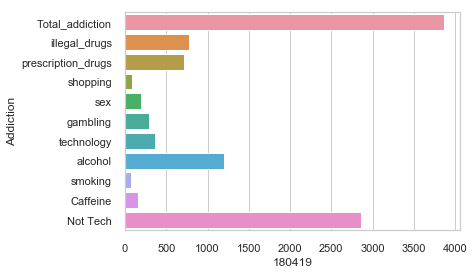

In [52]:
# barplot of first addiction search
ax = sns.barplot(x="180419", y="Addiction", data=df)

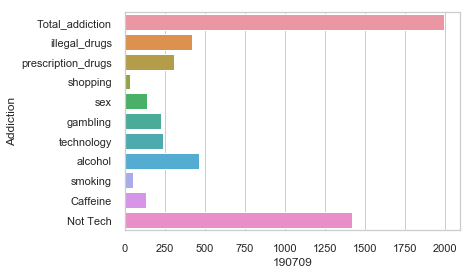

In [53]:
# barplot of second addiction search
ax = sns.barplot(x="190709", y="Addiction", data=df)